### Импорт библиотек

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2
import albumentations as albu

from tqdm import tqdm
from sklearn.model_selection import train_test_split

from preprocessing.DateCategories import balance_ultra_data
from datasets import UltravioletDataset
from tools import train_model, IoU, pixel_accuracy

# torch.cuda.empty_cache()
# torch.manual_seed(41)
# np.random.seed(41)
# torch.backends.cudnn.deterministic = True
# torch.cuda.manual_seed(41)

### Пути 

In [2]:
IMAGE_PATH = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/'
ULTRA_MASK_PATH = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/ultraviolet/label_'

### Подготовка данных

In [3]:
# разобьем все изображения на тренировочную, тестовую, валидационную части
X_train, X_test = train_test_split(balance_ultra_data, test_size = 0.102, random_state = 19)
X_train, X_val = train_test_split(X_train, test_size = 0.203, random_state = 19)

print('Размер X_train: {}\n'
      'Размер X_test: {}\n'
      'Размер X_val: {}'
      .format(len(X_train), len(X_test), len(X_val)))

Размер X_train: 140
Размер X_test: 21
Размер X_val: 36


### Аугментации

In [4]:
augment_1 = albu.Compose([
    albu.HorizontalFlip(),
    albu.VerticalFlip(),
    albu.RandomRotate90(),
    #albu.Transpose(),
    albu.OpticalDistortion(distort_limit=1, shift_limit=0.5),
    albu.RandomGamma(),
    albu.GridDistortion()
])

### Датасеты (train, val, test)

In [5]:
train_set = UltravioletDataset(img_path = IMAGE_PATH,
                               mask_path = ULTRA_MASK_PATH,
                               data = X_train,
                               res = [768, 512],
                               augmentation=augment_1)
val_set = UltravioletDataset(img_path = IMAGE_PATH,
                             mask_path = ULTRA_MASK_PATH,
                             res = [768, 512],
                             data = X_val)
test_set = UltravioletDataset(img_path = IMAGE_PATH,
                              mask_path = ULTRA_MASK_PATH,
                              res = [768, 512],
                              data = X_test)

In [6]:
# Загрузчики данных
train_dataloader = DataLoader(dataset=train_set,
                              batch_size=7,
                              shuffle=True)
val_dataloader = DataLoader(dataset=val_set,
                              batch_size=6,
                              shuffle=False)
test_dataloader = DataLoader(dataset=test_set,
                            batch_size=3,
                            shuffle=False)

### Импорт модели, гиперпараметры

In [7]:
import segmentation_models_pytorch as smp
model = smp.DeepLabV3Plus(encoder_name='resnet34', encoder_depth=5, encoder_weights='imagenet',
                          encoder_output_stride=16,
                          decoder_channels=256, decoder_atrous_rates=(12, 24, 36),
                          in_channels=3, classes=3)

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1.0e-3, weight_decay=1.0e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma = 0.01)
loss = torch.nn.CrossEntropyLoss()

### Обучение

In [ ]:
history = train_model(model = model, N_classes = 3, model_name = 'DeepLabV3Plus_resnet34_ultraviolet',
                optimizer = optimizer, scheduler = scheduler, loss = loss,
                train_dl = train_dataloader, val_dl = val_dataloader, num_epochs = 50)

Epoch № 1


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [07:37<03:16, 32.69s/it]

### Тестирование обученной модели

In [10]:
best_model_deeplab = torch.load('DeepLabV3Plus_resnet34_ultraviolet.pth')

accuracy = 0.9867591857910156
iou = 0.7267557268537864


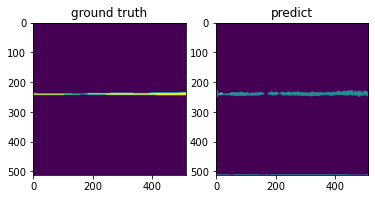

In [38]:
from tools import model_predict
img, mask = test_set[27]
model_predict(best_model_deeplab, img, mask)

accuracy = 0.9911422729492188
iou = 0.49557113863460545


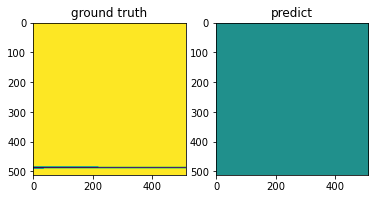

In [39]:
img, mask = test_set[29]
model_predict(best_model_deeplab, img, mask)

accuracy = 0.9742317199707031
iou = 0.4871158607263643


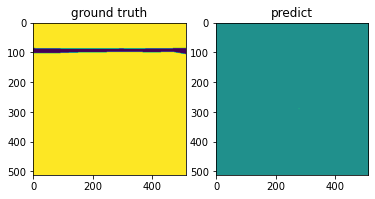

In [40]:
img, mask = test_set[30]
model_predict(best_model_deeplab, img, mask)

accuracy = 0.9974632263183594
iou = 0.9974632263184561


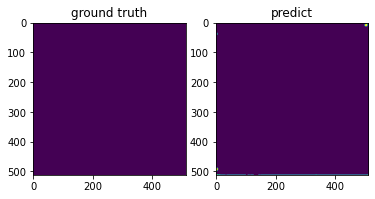

accuracy = 0.9999427795410156
iou = 0.9999427795410177


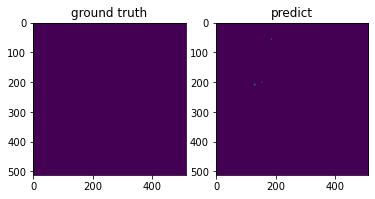

accuracy = 0.9911766052246094
iou = 0.4955883047741677


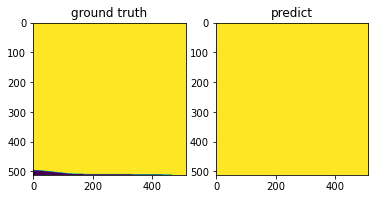

accuracy = 0.9999542236328125
iou = 0.9999542236328142


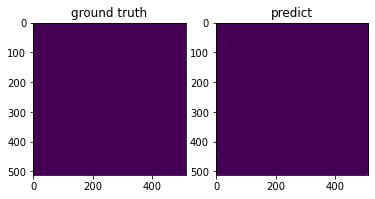

accuracy = 0.9822883605957031
iou = 0.4911441813806747


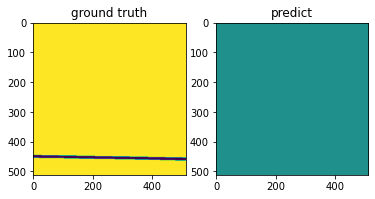

accuracy = 0.9979743957519531
iou = 0.9979743957520303


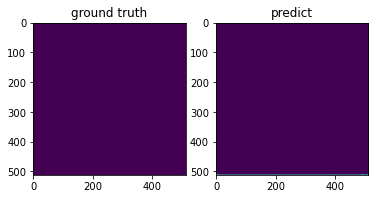

accuracy = 0.9991073608398438
iou = 0.9991073608398777


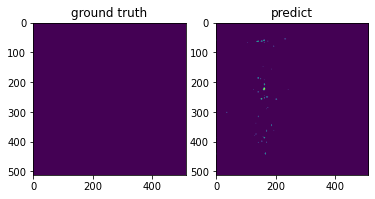

accuracy = 0.9210014343261719
iou = 0.48768940617330914


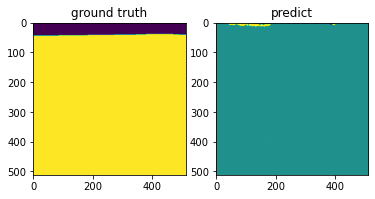

accuracy = 0.9987869262695312
iou = 0.9987869262695774


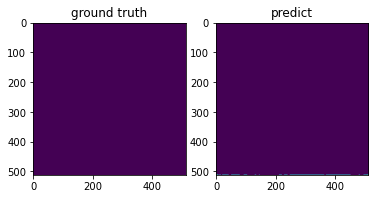

accuracy = 0.9998855590820312
iou = 0.9998855590820355


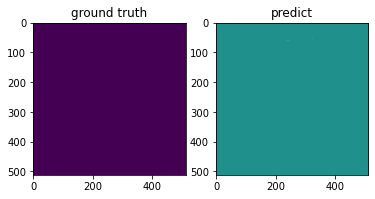

accuracy = 0.0
iou = 3.814697265479481e-11


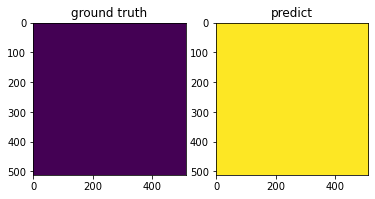

accuracy = 0.9999008178710938
iou = 0.9999008178710974


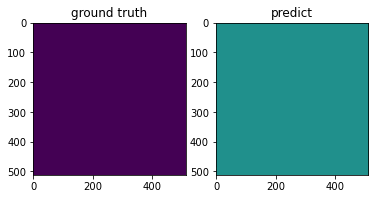

accuracy = 0.4903717041015625
iou = 0.2870867598771419


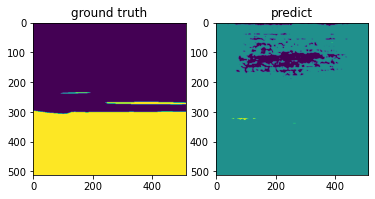

accuracy = 0.9985923767089844
iou = 0.998592376709038


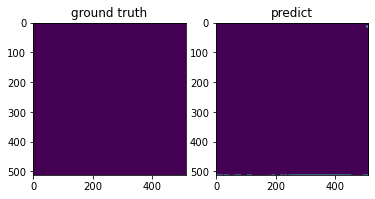

accuracy = 0.9818687438964844
iou = 0.49264761571850946


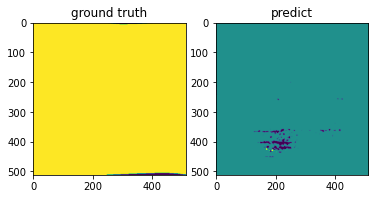

accuracy = 0.9995040893554688
iou = 0.9995040893554875


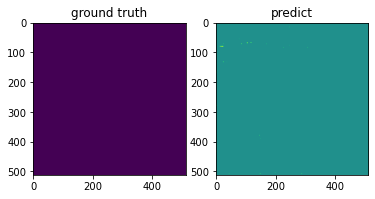

accuracy = 0.9313087463378906
iou = 0.4671149217108091


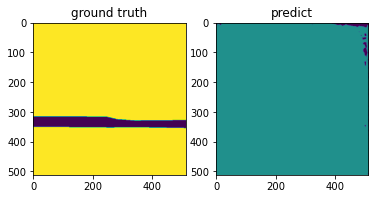

accuracy = 0.9999732971191406
iou = 0.9999732971191415


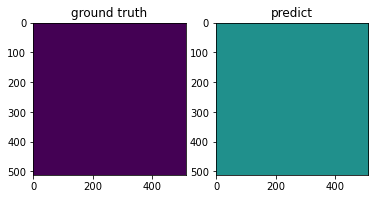

accuracy = 0.9998855590820312
iou = 0.9998855590820355


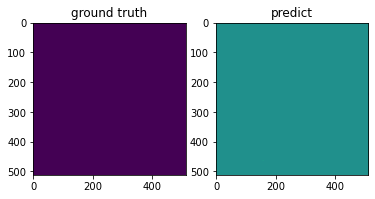

accuracy = 6.4849853515625e-05
iou = 6.484989166012382e-05


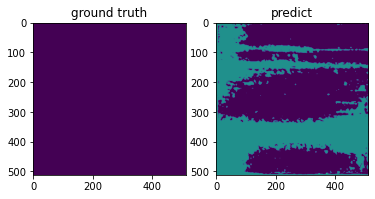

accuracy = 0.9996528625488281
iou = 0.9996528625488412


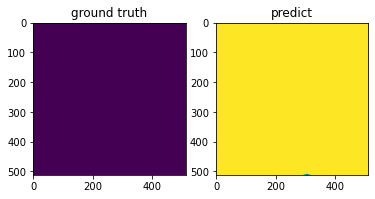

accuracy = 0.9974250793457031
iou = 0.9974250793458013


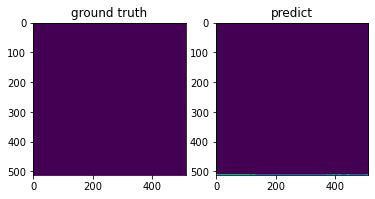

accuracy = 0.7549514770507812
iou = 0.6013932338701127


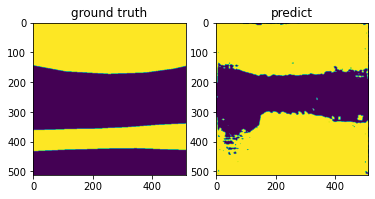

accuracy = 0.996673583984375
iou = 0.9966735839845018


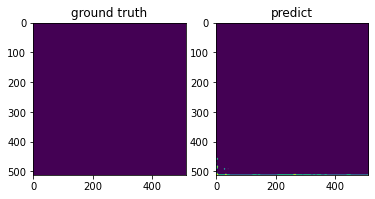

accuracy = 0.24938583374023438
iou = 0.13967829511204735


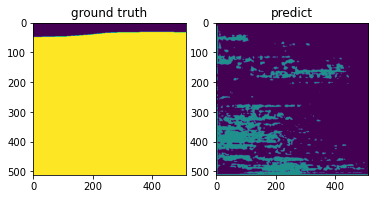

accuracy = 0.9964714050292969
iou = 0.9964714050294313


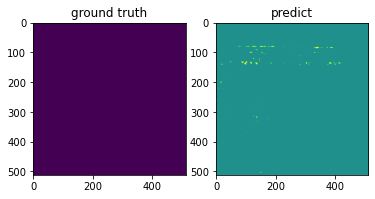

accuracy = 0.9968643188476562
iou = 0.9968643188477757


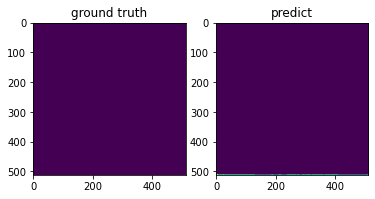

accuracy = 0.9867591857910156
iou = 0.7267557268537864


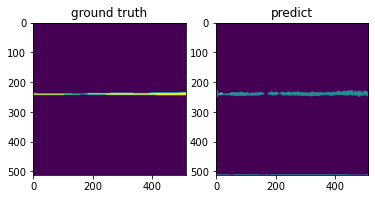

accuracy = 0.7647895812988281
iou = 0.7647895813078006


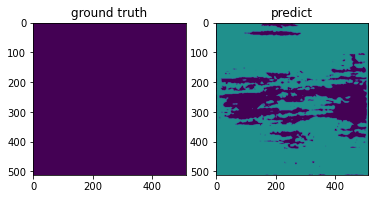

accuracy = 0.9911422729492188
iou = 0.49557113863460545


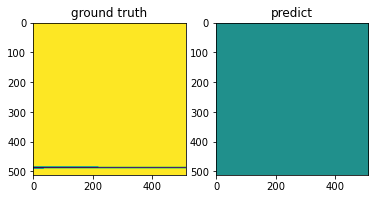

accuracy = 0.9742317199707031
iou = 0.4871158607263643


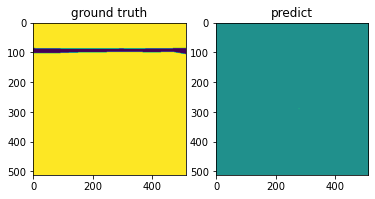

accuracy = 0.961669921875
iou = 0.961669921876462


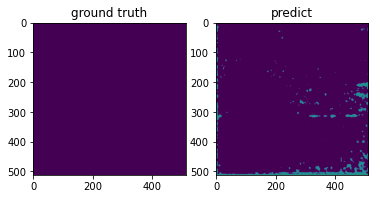

accuracy = 0.999969482421875
iou = 0.999969482421876


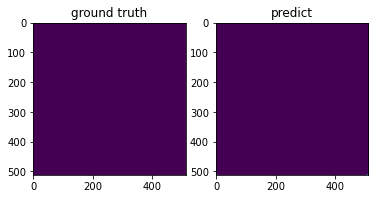

accuracy = 0.2010955810546875
iou = 0.1043895681270689


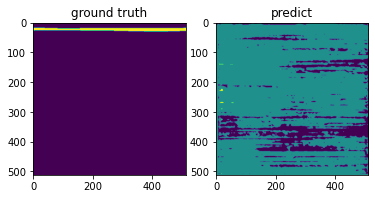

accuracy = 0.9978981018066406
iou = 0.9978981018067207


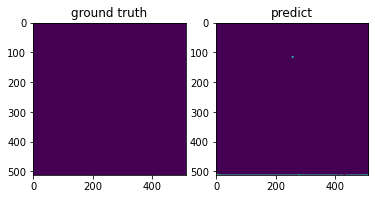

accuracy = 0.95928955078125
iou = 0.47976739711693867


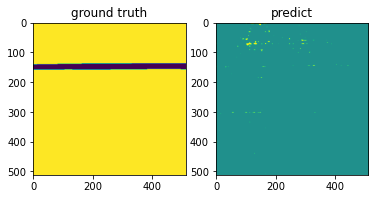

accuracy = 0.5730667114257812
iou = 0.28677793021308623


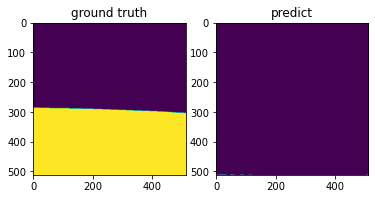

accuracy = 0.9976158142089844
iou = 0.9976158142090752


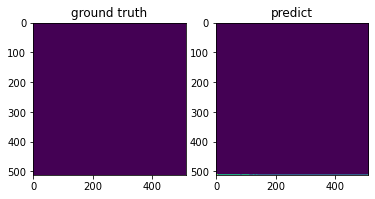

accuracy = 0.03330230712890625
iou = 0.012660634596038603


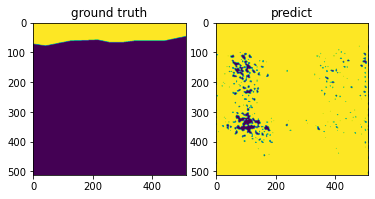

accuracy = 0.9973068237304688
iou = 0.9973068237305713


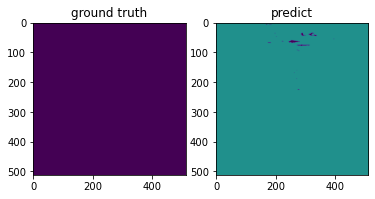

accuracy = 0.19649887084960938
iou = 0.08162762603216424


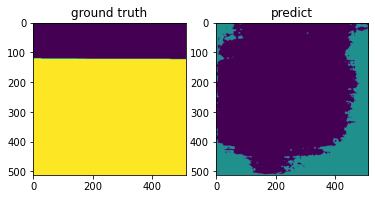

accuracy = 0.9899101257324219
iou = 0.9899101257328067


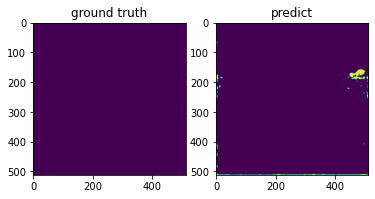

accuracy = 0.9519691467285156
iou = 0.5274536547774907


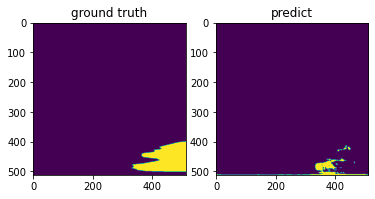

accuracy = 0.9977149963378906
iou = 0.9977149963379777


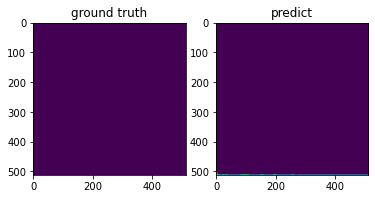

accuracy = 0.8829727172851562
iou = 0.6818448551296454


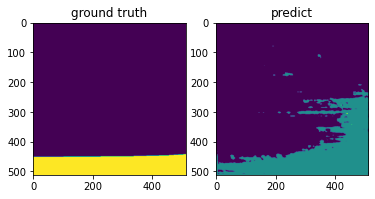

In [12]:
for i in range(0, len(test_set)):
    img, mask = test_set[i]
    model_predict(best_model_deeplab, img, mask)